In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Steup data frame and dates for daily precipitation data by year
year = 2019
df = pd.DataFrame(columns=['station'])
dts = pd.date_range(str(year) + "-01-01", str(year) + "-12-31", freq="D")

In [3]:
# Retrieve precipitation data for year and merge into dataframe
for dt in dts:
    d = str(dt.date())
    dt_df = pd.read_csv(f'outputs/prcp/{year}/csv/{d}.csv')
    df = df.merge(dt_df, on='station', how='outer')

In [4]:
# Add Station Information to Dataframe
stn_df = pd.read_csv(f'outputs/prcp/{year}/CA_{year}_coords.csv')
df = df.merge(stn_df, on='station')
df

,station,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,lat,lon,elev,name
0,US1CAAL0001,0.0,0.0,0.0,0.0,0.0,4.8,45.2,0.0,0.5,...,0.0,0.0,0.0,0.0,7.4,0.0,37.8123,-122.2160,113.4,CA PIEDMONT 1.0 SE
1,US1CAAL0003,0.0,0.0,0.0,0.0,0.0,6.1,20.8,0.0,2.3,...,0.0,0.0,0.0,0.5,5.8,0.0,37.7169,-122.0585,163.4,CA CASTRO VALLEY 0.4 NNE
2,US1CAAL0004,0.0,0.0,0.0,0.0,0.0,7.9,31.8,0.0,4.3,...,0.0,0.0,0.0,NaN,5.8,0.0,37.6483,-121.8745,107.0,CA PLEASANTON 1.8 SSE
3,US1CAAL0006,NaN,NaN,NaN,NaN,NaN,3.6,45.7,NaN,2.3,...,NaN,NaN,NaN,NaN,8.1,NaN,37.8319,-122.2503,58.2,CA OAKLAND 4.4 NNW
4,US1CAAL0011,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,37.6821,-122.1332,9.1,CA SAN LORENZO 0.5 NNW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,USW00093241,0.0,0.0,0.0,0.0,11.7,72.9,0.8,0.0,2.0,...,0.0,0.0,0.0,16.3,0.0,0.0,38.3775,-121.9586,31.7,CA VACAVILLE/NUT TREE AP ASOS
1188,USW00093242,0.0,0.0,0.0,0.0,5.3,8.6,0.0,0.0,5.1,...,2.8,0.0,0.0,0.0,0.0,0.0,36.9850,-120.1106,76.5,CA MADERA MUNI AP
1189,USW00093243,0.0,0.0,0.0,0.0,9.5,18.8,1.5,0.0,0.6,...,2.0,0.0,0.0,1.9,0.0,0.0,37.2381,-120.8825,23.8,CA MERCED 23 WSW CRN
1190,USW00093245,0.0,0.0,0.0,0.0,9.4,30.4,0.0,16.8,10.6,...,0.0,0.0,0.0,16.7,0.0,0.0,38.3208,-123.0747,19.2,CA BODEGA 6 WSW CRN


In [5]:
date_columns = df.columns[1:366]  # Adjust this if necessary

# Convert the daily columns to numeric (if they are not already)
df[date_columns] = df[date_columns].apply(pd.to_numeric, errors='coerce')

# Initialize a dictionary to hold the monthly data
monthly_data = {}

# Iterate over each station
for station in df.index:
    monthly_totals = []
    for month in range(1, 13):
        # Generate the date range for the current month
        days_in_month = pd.date_range(f'2019-{month:02d}-01', periods=31)  # Adjust periods for different months if necessary
        days_in_month = days_in_month[days_in_month.month == month]  # Ensure only the current month is included
        
        # Find the corresponding columns in the DataFrame
        daily_columns = [col for col in df.columns if col in days_in_month.strftime('%Y-%m-%d')]
        
        # Sum the daily values for the current month
        monthly_total = df.loc[station, daily_columns].sum()
        monthly_totals.append(monthly_total)
    
    monthly_data[station] = monthly_totals

# Create a new DataFrame with the monthly totals
monthly_df = pd.DataFrame(monthly_data, index=[f'2019-{month:02d}' for month in range(1, 13)]).T

# Add the metadata columns back to the new DataFrame
metadata_columns = ['lat', 'lon', 'elev', 'name']  # Adjust this list based on your actual DataFrame
monthly_df = pd.concat([monthly_df, df[metadata_columns]], axis=1)

# Remove rows with NaN values
monthly_df = monthly_df.dropna()

# Sum each month
monthly_sums2019 = monthly_df.sum(axis=0)

# Display the resulting DataFrame and the monthly sums
print(monthly_df)
print(monthly_sums2019)

      2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  2019-07  2019-08  \
0       141.8    231.1    132.5     15.5     73.3      0.0      0.0      0.0   
1        97.4    174.2    128.3     20.5     76.6      0.5      0.0      0.0   
2       113.7    194.9     86.9      1.8     21.9      0.0      0.0      0.0   
3       140.8    235.9    125.9      8.7     73.9      0.0      0.0      0.0   
4        55.4    176.5     89.5      9.7     44.5      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1187    187.0    199.0    138.8      4.6     73.2      0.0      0.0      0.0   
1188     35.6     70.9     52.3      4.8     40.2      0.0      0.0      0.0   
1189     65.3     86.7     36.7      0.3     33.7      0.8      0.0      0.0   
1190    136.2    390.8    184.0     24.0    101.0     19.1      0.0      0.0   
1191     41.6     49.0     39.6     56.9     36.2      3.6      0.3     13.8   

      2019-09  2019-10  2019-11  2019-1

In [6]:
# Select only the monthly columns (assuming the last few columns are metadata and not needed here)
monthly_sums2019 = monthly_sums2019.iloc[:12]

# Create a dictionary to map month numbers to abbreviations
month_mapping = {
    '2019-01': 'Jan', '2019-02': 'Feb', '2019-03': 'Mar', '2019-04': 'Apr',
    '2019-05': 'May', '2019-06': 'Jun', '2019-07': 'Jul', '2019-08': 'Aug',
    '2019-09': 'Sep', '2019-10': 'Oct', '2019-11': 'Nov', '2019-12': 'Dec'
}

# Rename the Series index using the month mapping
monthly_sums2019.index = monthly_sums2019.index.map(month_mapping)

# Convert millimeters to inches and round to 2 decimal places
monthly_sums2019 = (monthly_sums2019 * 0.0393701).round(2)

monthly_sums2019

Jan     6212.818316
Feb    10732.667213
Mar     4533.159928
Apr      1182.66993
May     2837.655076
Jun       68.314998
Jul       44.500024
Aug       66.082713
Sep       523.24044
Oct      139.858343
Nov     1809.331686
Dec     6138.841898
dtype: object

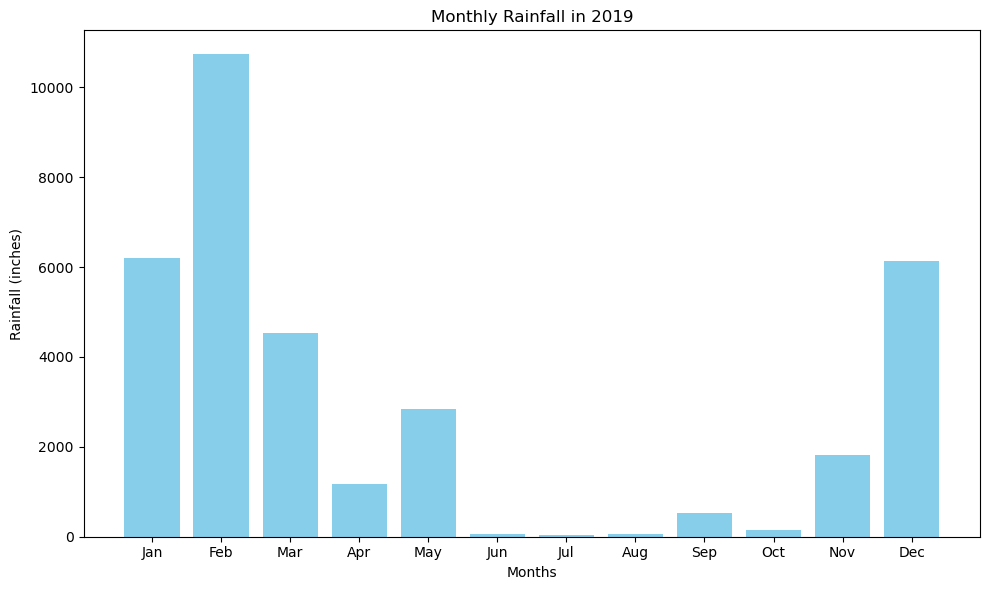

In [8]:
# Extract months and rainfall values
months = list(monthly_sums_inches.keys())
rainfall_values = list(monthly_sums_inches.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, rainfall_values, color='skyblue')

# Add labels and title
plt.xlabel('Months')
plt.ylabel('Rainfall (inches)')
plt.title('Monthly Rainfall in 2019')

# Adjust layout for better appearance
plt.tight_layout()

output_path = Path("outputs")
os.makedirs(output_path, exist_ok=True)

# Save the plot as an image file in the "output" folder
output_file = os.path.join(output_path, "Monthly_Rainfall_2019.png")
plt.savefig(output_file)

# Show the plot
plt.show()